<i>## Comments will be provided using this format. Key takeaway: groups are encouraged to change the formatting, but not the structure. Groups are also allowed to create additional notebooks - for instance, create one notebook for data exploration, and one notebook for each preprocessing-modelling-evaluation pipeline -, but must strive to keep an unified style across notebooks.</i>

#### NOVA IMS / BSc in Data Science / Text Mining 2025/2026
### <b>Group Project: "Straining the great southern Melting Pot"</b>
#### Notebook `Notebook Title`

#### Group:
- `Group member #1`
- `(...)`
- `Group member #5`

#### <font color='#BFD72'>Table of Contents </font> <a class="anchor" id='toc'></a> 
- [1. Data Understanding](#P1)
- [2. General Data Preparation](#P2) 
- [3. Multilabel Classification (Information Requirement 3311)](#P3)
    - [3.1 Specific Data Preparation](#P31)
    - [3.2 Model Implementation](#P32)
    - [3.3 Model Evaluation](#P3n)
- [4. Sentiment Analysis (Information Requirement 3312)](#P4)
    - [4.1 Specific Data Preparation](#P41)
    - [4.2 Model Implementation](#P42)
    - [4.3 Model Evaluation](#P43)
- [...]
- [N. Additional Tasks (Information Requirements 332n)](#Pn)
    - [N.1 Specific Data Preparation](#Pn1)
    - [N.2 Model Implementation](#Pn2)
    - [N.3 Model Evaluation](#Pn3)

<i>## Note that the notebook structure differs from the report: instead of following the CRISP-DM phases and then specifying the different problems inside the phases, the notebook is structured by problem, with the CRISP-DM phases being defined for each specific problem.

In [1]:
## All imports must be concentrated on a cell that immediately follow the table of contents
import time
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

<font color='#BFD72F' size=5>1. Data Understanding</font> <a class="anchor" id="P1"></a>
  
[Back to TOC](#toc)

<i>## Use markdown cells to describe the purpose of the code cells that follow them.</i>

Import the dataset

In [2]:
df = pd.read_csv("data_atlanta/atlanta_restaurant_slice_2023.csv")
df.head()

title        categoryName                                 website  \
0  The Optimist  Seafood restaurant  https://www.theoptimistrestaurant.com/   
1  The Optimist  Seafood restaurant  https://www.theoptimistrestaurant.com/   
2  The Optimist  Seafood restaurant  https://www.theoptimistrestaurant.com/   
3  The Optimist  Seafood restaurant  https://www.theoptimistrestaurant.com/   
4  The Optimist  Seafood restaurant  https://www.theoptimistrestaurant.com/   

                                                 url  reviewsCount  stars  \
0  https://www.google.com/maps/place/The+Optimist...          3349    5.0   
1  https://www.google.com/maps/place/The+Optimist...          3349    5.0   
2  https://www.google.com/maps/place/The+Optimist...          3349    5.0   
3  https://www.google.com/maps/place/The+Optimist...          3349    5.0   
4  https://www.google.com/maps/place/The+Optimist...          3349    5.0   

                                                text  
0  One word amazing!! The red fish,  halibut,  fr...  
1  First time here and the food is great and the ...  
2  I recently had the pleasure of dining at Optim...  
3  Beautiful atmosphere and delicious food. All o...  
4  We had a wonderful dinner at the Optimist. Our...

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53566 entries, 0 to 53565
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         53566 non-null  object 
 1   categoryName  53566 non-null  object 
 2   website       50600 non-null  object 
 3   url           53566 non-null  object 
 4   reviewsCount  53566 non-null  int64  
 5   stars         53566 non-null  float64
 6   text          53566 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 2.9+ MB


In [4]:
total_duplicates = df.duplicated().sum()
print(f"Total fully duplicated rows: {total_duplicates}")

Total fully duplicated rows: 99


In [7]:
# Check duplicates where the same restaurant has the same review text
dup_subset = df[df.duplicated(subset=['title', 'stars', 'text'], keep=False)]

print(f"Duplicate reviews found: {dup_subset.shape[0]}")
dup_subset.head(3)


Duplicate reviews found: 262


title          categoryName  \
537   Chick-fil-A  Fast food restaurant   
1364         Aria   American restaurant   
1369         Aria   American restaurant   

                                                website  \
537   https://www.chick-fil-a.com/locations/ga/peach...   
1364                           http://www.aria-atl.com/   
1369                           http://www.aria-atl.com/   

                                                    url  reviewsCount  stars  \
537   https://www.google.com/maps/place/Chick-fil-A/...          1019    5.0   
1364  https://www.google.com/maps/place/Aria/@33.838...           735    5.0   
1369  https://www.google.com/maps/place/Aria/@33.838...           735    5.0   

                                                   text  
537                                       Great service  
1364  Early celebration of our son’s birthday. The 8...  
1369  Early celebration of our son’s birthday. The 8...

In [8]:
duplicate_pairs = df.duplicated(subset=['title', 'stars', 'text']).sum()
print(f"Unique duplicate combinations (to drop): {duplicate_pairs}")

Unique duplicate combinations (to drop): 142


In [9]:
df[df.duplicated(subset=['title', 'stars', 'text'], keep=False)].sort_values('title').head(20)

title          categoryName  \
2951                          AG           Steak house   
2958                          AG           Steak house   
34085                     Arby's  Fast food restaurant   
34145                     Arby's  Fast food restaurant   
34113                     Arby's  Fast food restaurant   
15302                     Arby's  Fast food restaurant   
15408                     Arby's  Fast food restaurant   
1364                        Aria   American restaurant   
1369                        Aria   American restaurant   
14050  Baraonda Ristorante & Bar    Italian restaurant   
14056  Baraonda Ristorante & Bar    Italian restaurant   
48839            Blue Moon Pizza      Pizza restaurant   
48789            Blue Moon Pizza      Pizza restaurant   
33056               Buck's Pizza      Pizza restaurant   
33031               Buck's Pizza      Pizza restaurant   
24564                Captain D's    Seafood restaurant   
24560                Captain D's    Seafood restaurant   
24507                Captain D's    Seafood restaurant   
24453                Captain D's    Seafood restaurant   
18018   Carrabba's Italian Grill    Italian restaurant   

                                                 website  \
2951   http://www.ritzcarlton.com/en/hotels/georgia/a...   
2958   http://www.ritzcarlton.com/en/hotels/georgia/a...   
34085  https://locations.arbys.com/ga/peachtreecity/1...   
34145  https://locations.arbys.com/ga/peachtreecity/1...   
34113  https://locations.arbys.com/ga/peachtreecity/1...   
15302  https://locations.arbys.com/ga/cumming/403-tri...   
15408  https://locations.arbys.com/ga/cumming/403-tri...   
1364                            http://www.aria-atl.com/   
1369                            http://www.aria-atl.com/   
14050                    http://www.baraondaatlanta.com/   
14056                    http://www.baraondaatlanta.com/   
48839                      http://www.bluemoonpizza.com/   
48789                      http://www.bluemoonpizza.com/   
33056                         https://buckspizzaptc.com/   
33031                         https://buckspizzaptc.com/   
24564  https://locations.captainds.com/ll/US/GA/Cummi...   
24560  https://locations.captainds.com/ll/US/GA/Cummi...   
24507  https://locations.captainds.com/ll/US/GA/Cummi...   
24453  https://locations.captainds.com/ll/US/GA/Cummi...   
18018  https://locations.carrabbas.com/georgia/cummin...   

                                                     url  reviewsCount  stars  \
2951   https://www.google.com/maps/place/AG/@33.75858...           531    5.0   
2958   https://www.google.com/maps/place/AG/@33.75858...           531    5.0   
34085  https://www.google.com/maps/place/Arby's/@33.3...           648    5.0   
34145  https://www.google.com/maps/place/Arby's/@33.3...           648    5.0   
34113  https://www.google.com/maps/place/Arby's/@33.3...           648    5.0   
15302  https://www.google.com/maps/place/Arby's/@34.1...           676    5.0   
15408  https://www.google.com/maps/place/Arby's/@34.1...           676    5.0   
1364   https://www.google.com/maps/place/Aria/@33.838...           735    5.0   
1369   https://www.google.com/maps/place/Aria/@33.838...           735    5.0   
14050  https://www.google.com/maps/place/Baraonda+Ris...           955    5.0   
14056  https://www.google.com/maps/place/Baraonda+Ris...           955    5.0   
48839  https://www.google.com/maps/place/Blue+Moon+Pi...          1348    5.0   
48789  https://www.google.com/maps/place/Blue+Moon+Pi...          1348    5.0   
33056  https://www.google.com/maps/place/Buck's+Pizza...           154    4.0   
33031  https://www.google.com/maps/place/Buck's+Pizza...           154    4.0   
24564  https://www.google.com/maps/place/Captain+D's/...           728    5.0   
24560  https://www.google.com/maps/place/Captain+D's/...           728    5.0   
24507  https://www.google.com/maps/place/Captain+D's/...           728    5.0   
24453  h

In [10]:
# unique values of "review_count"
print(df['title'].unique())
print(df['reviewsCount'].unique())
print(df['categoryName'].unique())
print(df['stars'].unique())

['The Optimist' "Nino's Italian Restaurant" 'El Valle'
 'Longleaf Restaurant' 'Benihana' "Mama's Restaurant" 'Dirty Rascal'
 'Chick-fil-A' 'KR SteakBar' 'The Bistro – Eat. Drink. Connect.®'
 'Johnny Rockets' 'Grindhouse Killer Burgers' '5Church Buckhead'
 'Egg Harbor Cafe' 'El Azteca' 'Mi Barrio Mexican Restaurant' 'Grana'
 'Fork & Juniper Restaurant' 'NaanStop' 'Yard House' 'Atalian'
 'TWO urban licks' 'Aria' 'Miller Union' 'No Mas! Cantina' "Houston's"
 'Staplehouse' 'Alma Cocina Downtown' 'Atlas' 'Aviva by Kameel Downtown'
 'La Grotta Ristorante' 'Nan Thai Fine Dining' 'La Tavola Trattoria'
 'Bacchanalia' 'Bones Restaurant' 'Canoe' 'Old Lady Gang Southern Cuisine'
 'Jalisco Restaurant' "Fat Matt's Rib Shack" 'Bangkok Thai Restaurant'
 'BrickStone Cafe & Restaurant' 'Argosy' 'Atlanta Fish Market'
 'Six Feet Under Pub & Fish House - Grant Park'
 'Local Three Kitchen & Bar' 'Eats' 'Gunshow' 'AG' 'Lure'
 'Tuk Tuk Thai Food Loft' 'Treehouse Restaurant and Pub' 'Hard Rock Cafe'
 'J.A.T.C 

In [11]:
df.describe()

reviewsCount         stars
count  53566.000000  53566.000000
mean     917.447355      4.050498
std     1129.721892      1.448570
min        5.000000      1.000000
25%      404.000000      3.000000
50%      644.000000      5.000000
75%     1051.250000      5.000000
max    13268.000000      5.000000

In [12]:
df.isna().sum()

title              0
categoryName       0
website         2966
url                0
reviewsCount       0
stars              0
text               0
dtype: int64

<Axes: xlabel='stars', ylabel='count'>

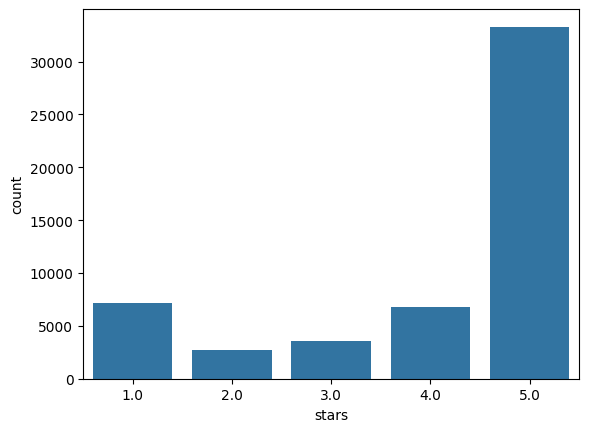

In [13]:
#bar chart visualization of star ratings
sns.countplot(x='stars', data=df)

<Axes: xlabel='reviewsCount', ylabel='Count'>

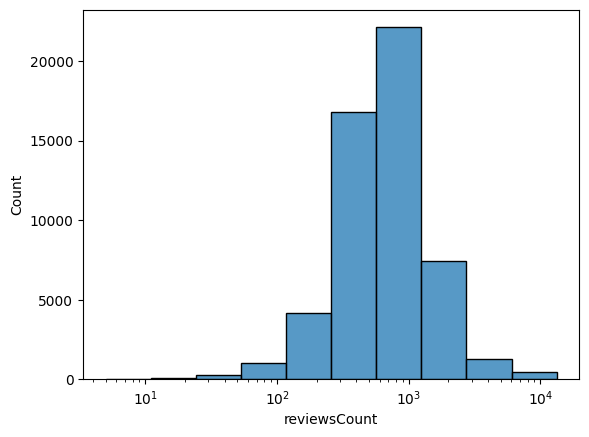

In [14]:
sns.histplot(df['reviewsCount'], bins=10, kde=False, log_scale=True)

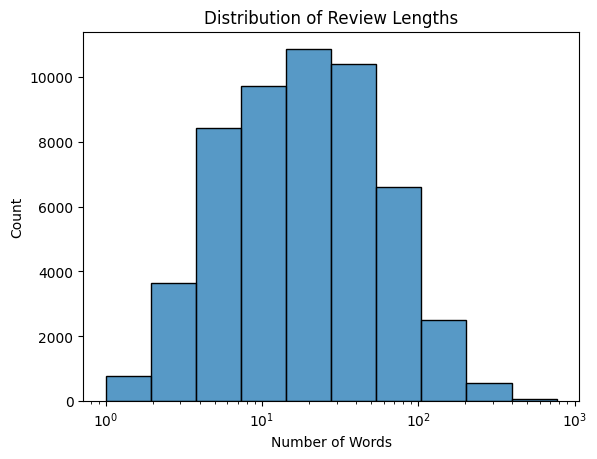

In [15]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))

sns.histplot(df['review_length'], bins=10, log_scale=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()

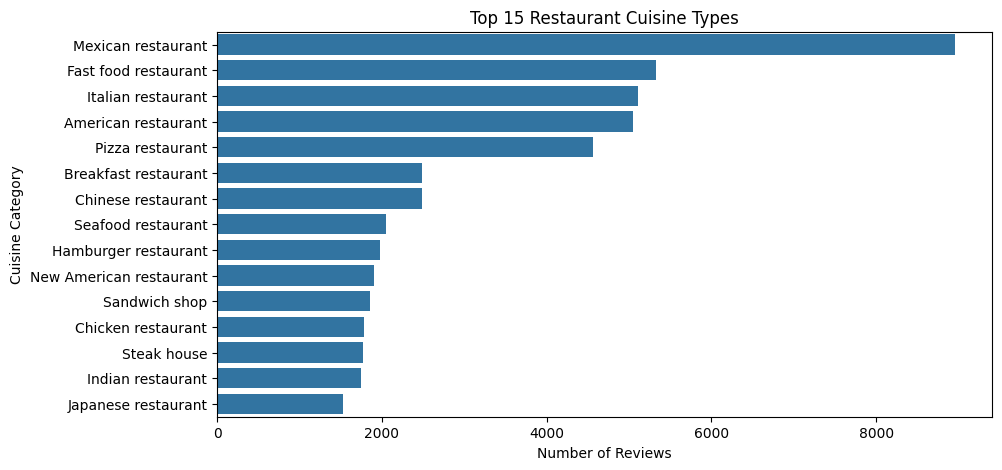

In [16]:
top_categories = df['categoryName'].value_counts().head(15)

plt.figure(figsize=(10,5))
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 15 Restaurant Cuisine Types')
plt.xlabel('Number of Reviews')
plt.ylabel('Cuisine Category')
plt.show()

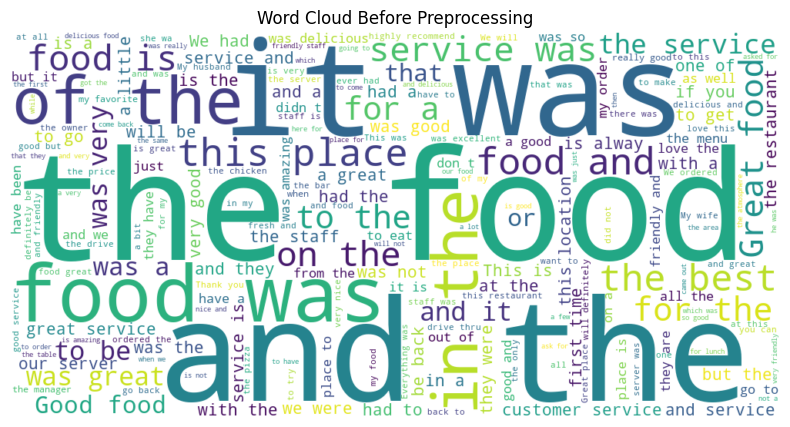

In [17]:
# Word Cloud Before Preprocessing
raw_text = ' '.join(df['text'])
wc_before = WordCloud(width=1000, height=500, background_color='white', stopwords='english').generate(raw_text)

plt.figure(figsize=(10,5))
plt.imshow(wc_before, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Before Preprocessing')
plt.show()

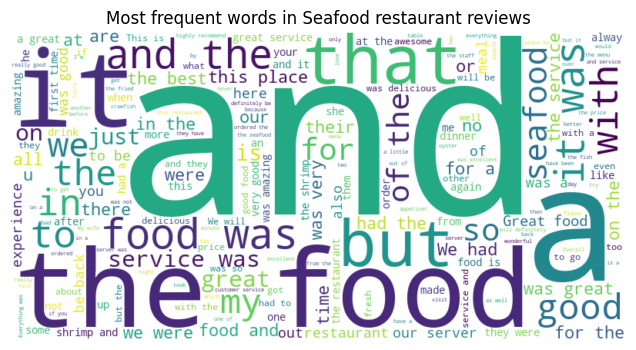

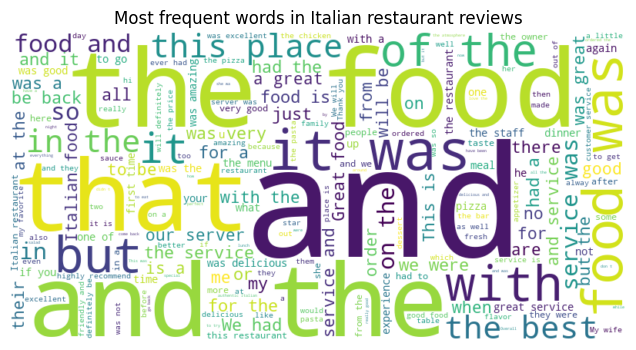

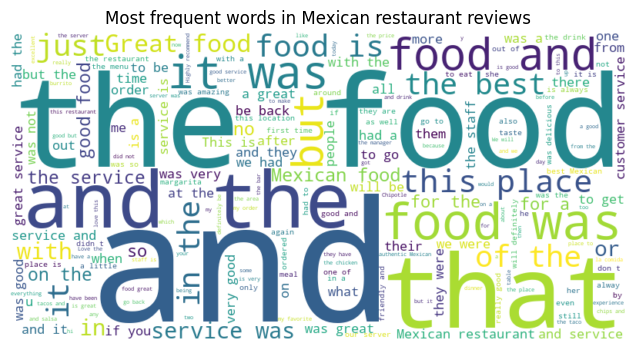

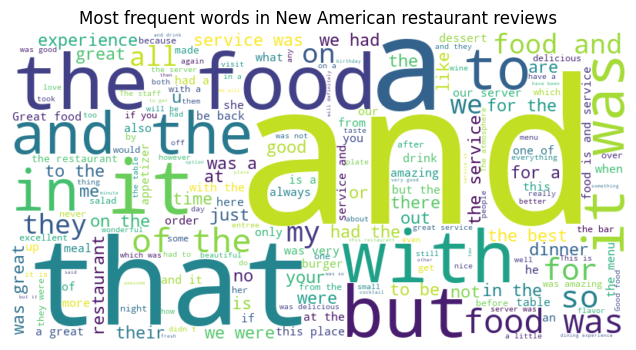

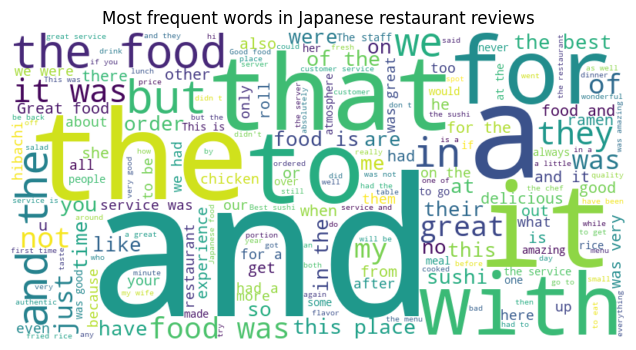

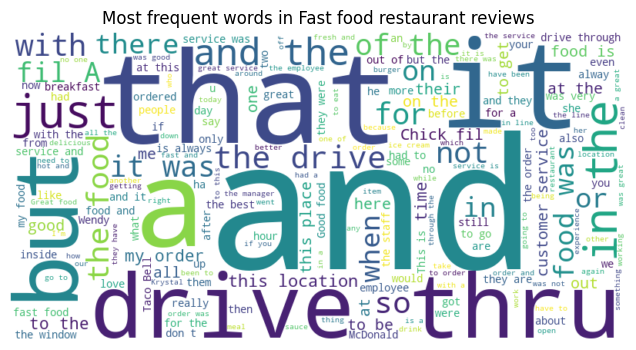

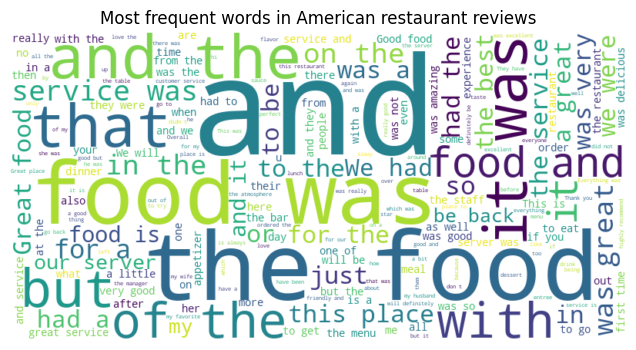

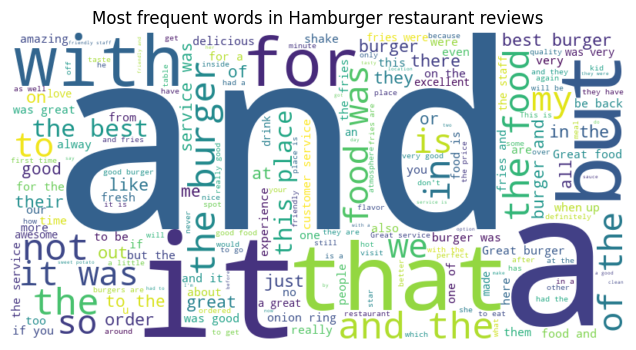

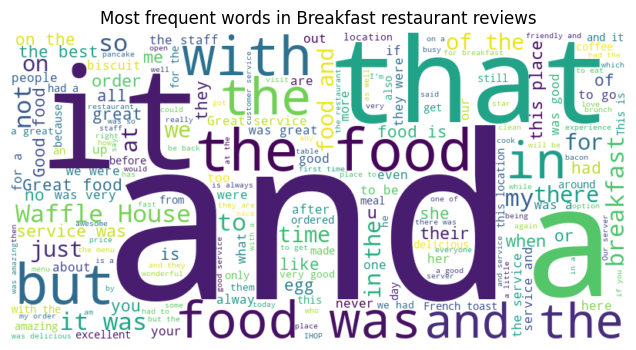

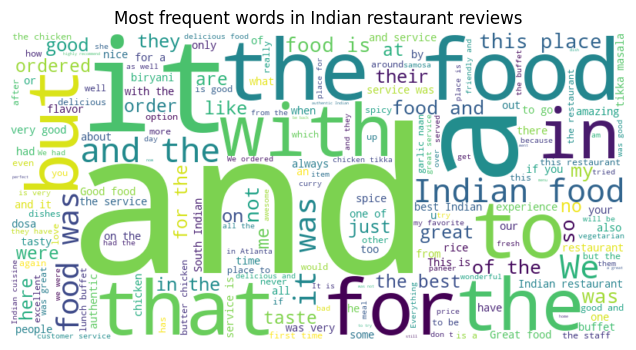

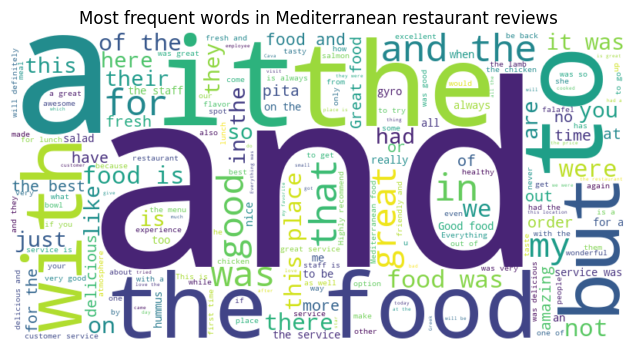

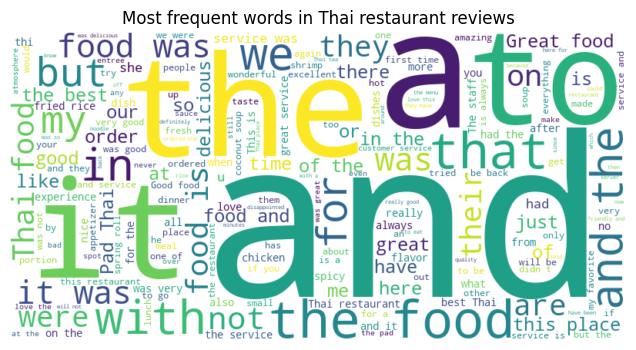

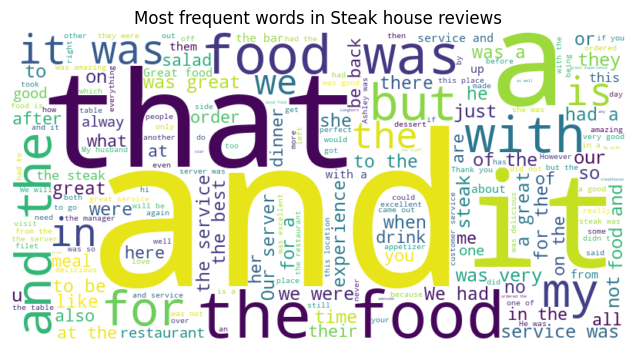

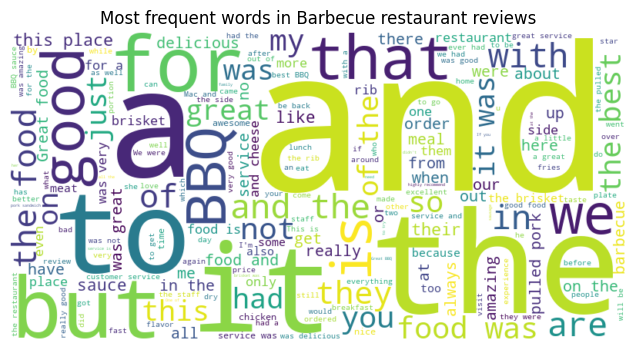

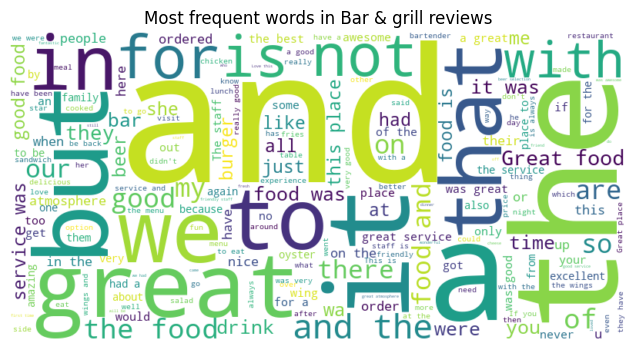

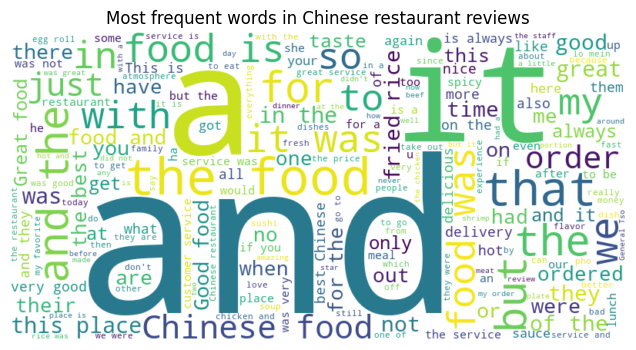

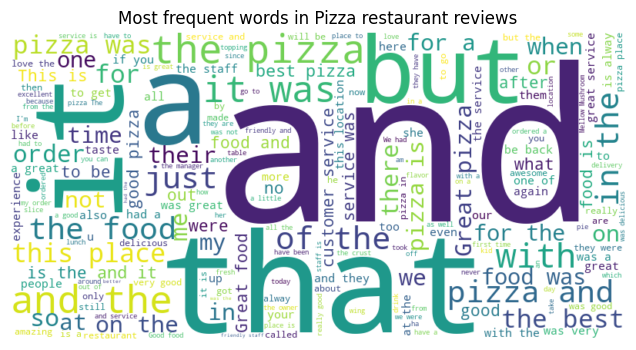

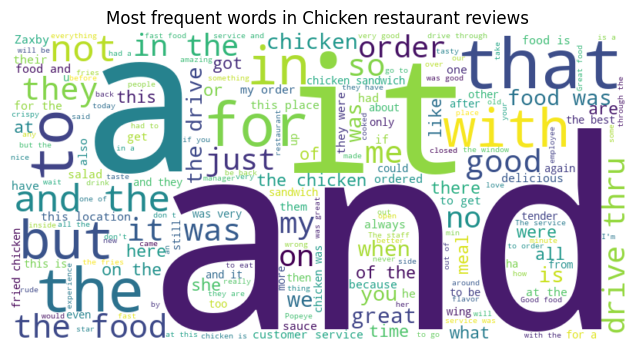

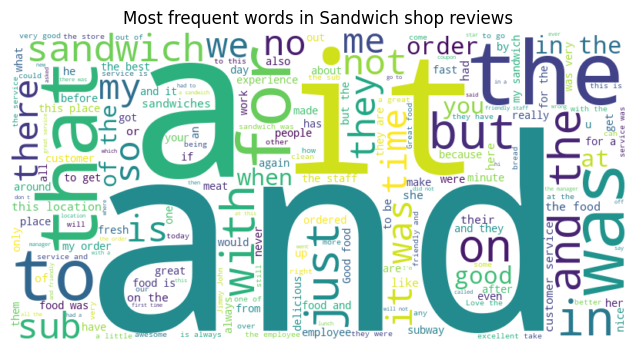

In [18]:
categories_to_plot = df['categoryName'].unique().tolist()

for cat in categories_to_plot:
    subset = df[df['categoryName'].str.contains(cat, case=False, na=False)]
    text_all = ' '.join(subset['text'])
    wc = WordCloud(width=800, height=400, background_color='white',
                   stopwords='english', max_words=200).generate(text_all)

    plt.figure(figsize=(8,4))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Most frequent words in {cat} reviews')
    plt.show()

<font color='#BFD72F' size=5>2. Data Preprocessing</font> <a class="anchor" id="P1"></a>

In [19]:
# replace "title" with "restaurant_name"
df.rename(columns={'title': 'restaurant_name', 'url': 'locationUrl', 'categoryName': 'Category', 'text': 'raw_content'}, inplace=True)

In [20]:
df.drop_duplicates(subset=['restaurant_name', 'stars', 'raw_content'], inplace=True)

In [21]:
dup_check = df.duplicated(subset=['restaurant_name', 'stars', 'raw_content', 'reviewsCount']).sum()
print(f"Duplicates even including review count: {dup_check}")

Duplicates even including review count: 0


In [ ]:
df.head()

isto não serve para nada

In [5]:
## Functions must be defined on separate cells
def text_mining_project_simulator():
    project_progress = 0
    while project_progress < 100:
        ## Comments on code cells can be used to highlight specific sections of yout code
        project_progress += 1
        print("working, albeit reluctantly, on a project that's {}% done \n\n".format(project_progress))
        time.sleep(5)

In [ ]:
## Calls to functions (whether defined by the group, or imported from packages) must be separate from their definition

text_mining_project_simulator()